In [7]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import count
from matplotlib.animation import FuncAnimation
import random
import serial
import datetime
import serial.tools.list_ports
import os
import sys
pd.plotting.register_matplotlib_converters()
import seaborn as sns

In [18]:
root = 'IAPS2_filter'
nama = input('nama klien = ')
emosi = input('emosi klien = ')
df = pd.read_csv(root+'/'+nama+emosi+'.csv')
print(root+'/'+nama+emosi+'.csv')
df = df.drop("Unnamed: 0",axis=1)
pp = df['Pipi']
als = df['Alis']

nama klien = amin
emosi klien = NH1
IAPS2_filter/aminNH1.csv


In [ ]:
p = list(serial.tools.list_ports.comports())
arduino = serial.Serial(p[0].device,baudrate=9600)
arduino.flushInput()
if not arduino.isOpen():
    arduino.open()
global count
while True:
    try:
        data = arduino.readline()
        b = data.decode("ISO-8859-1").strip()
        waktuReal = datetime.datetime.now()
        waktu = waktuReal.strftime('%H:%M:%S.%f')[:-3]
        c = b.split(',')
        if sys.getsizeof(c[0])==56:
            pipi.append(c[0])
            alis.append(c[1])
            wkt.append(waktu)
            count+=1
            print(count)
    except KeyboardInterrupt:
        print("Logging data selesai!")
        arduino.close()
        count = 0
        break

<IPython.core.display.Javascript object>


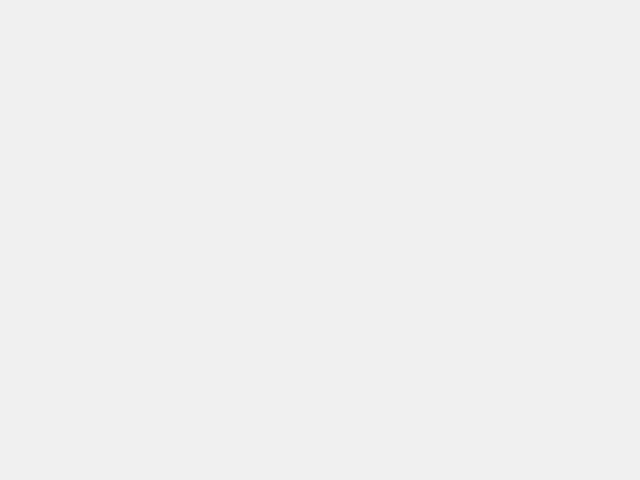

In [4]:
pipi = []
alis = []
index = count()
data1 = df['Pipi']
data2 = df['Alis']
x_vals = []
y_vals = []
index = count()
plt.style.use('fivethirtyeight')
def animate(i):
    f = plt.figure()
    f.set_figwidth(10)
    f.set_figheight(3)
    x_vals.append(next(index))
    pipi.append(float(data1[next(index)]))
    alis.append(float(data2[next(index)]))
    plt.cla()
    plt.plot(x_vals,pipi, label='EMG Pipi')
    plt.plot(x_vals,alis, label='EMG Alis')
    plt.legend(loc='upper left')
    plt.tight_layout()
ani = FuncAnimation(plt.gcf(),animate,interval=500)
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


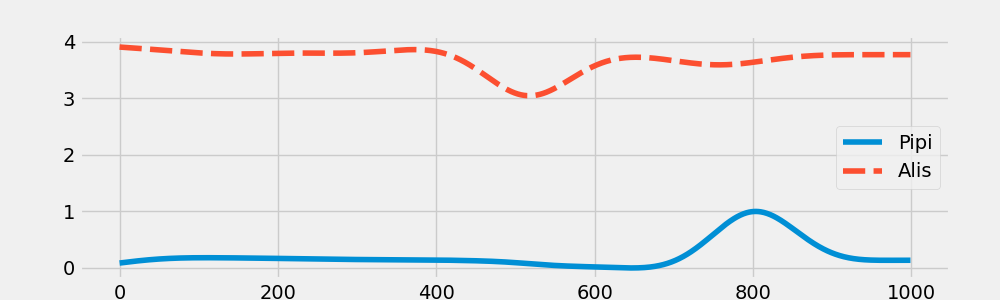

<AxesSubplot:>

In [21]:
plt.figure(figsize=(10,3))
sns.lineplot(data=df)